In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
bet1=pd.read_excel("приток.xlsx", "Лист1")
wor1=pd.read_excel("отток.xlsx", "Лист1")

In [15]:
wor2 = pd.DataFrame({"t": [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 30, 40, 50, 60, 70, 80, 90, 100], "p*1e-5": [5.1, 5.8, 6.3, 6.8, 7.3, 7.7, 8.2, 8.9, 9.2, 10, 11, 13, 18, 23, 28, 33, 39, 44, 50, 56]})
bet2 = pd.DataFrame({"t": [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 30, 35, 40], "p*1e-5": [61, 58, 55, 41, 31, 26, 22, 18, 16, 14, 12, 11, 9.4, 8.6, 7.9, 7.3, 6.8, 6.3, 6.0, 5.8, 5.5, 5.1, 4.8, 4.7]})

In [33]:
bet1["ln"]=np.log(bet1["p*1e-5"]-4.5)
bet2["ln"]=np.log(bet2["p*1e-5"]-4.5)

In [34]:
bet1_cut=bet1.loc[:8]
bet1_cut

,t,p*1e-5,ln
0,0.00,17.0,2.525729
1,1.85,13.0,2.140066
2,3.81,10.0,1.704748
3,6.36,8.0,1.252763
4,7.84,7.2,0.993252
5,10.36,6.3,0.587787
6,11.85,5.9,0.336472
7,14.21,5.5,0.000000
8,15.38,5.4,-0.105361


In [35]:
bet2_cut=bet2.loc[3:11]
bet2_cut

,t,p*1e-5,ln
3,7,41.0,3.597312
4,8,31.0,3.277145
5,9,26.0,3.068053
6,10,22.0,2.862201
7,11,18.0,2.602690
8,12,16.0,2.442347
9,13,14.0,2.251292
10,14,12.0,2.014903
11,15,11.0,1.871802


In [28]:
def mnk(x,y,free=1):
    k,a=np.polyfit(x, y, free)
    mu = np.mean(y) # средее
    mv = np.mean(x)
    mu2 = np.mean(y**2)
    mv2 = np.mean(x**2) # средний квадрат
    muv = np.mean (x*y) 
    sigma_k = np.sqrt(1/(x.shape[0]-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    print("Погрешность углового коэфицента")
    print(sigma_k)
    sigma_b = sigma_k * np.sqrt(mv2-mv**2)
    print("Погрешность свободного коэфицента")
    print(sigma_b)
    return (k,a)

In [36]:
kb1,ab1=mnk(bet1_cut["t"], bet1_cut["ln"])
kb2,ab2=mnk(bet2_cut["t"], bet2_cut["ln"])

Погрешность углового коэфицента
0.005353890975750644
Погрешность свободного коэфицента
0.027387043934675
Погрешность углового коэфицента
0.006100429771770758
Погрешность свободного коэфицента
0.015751241940517375


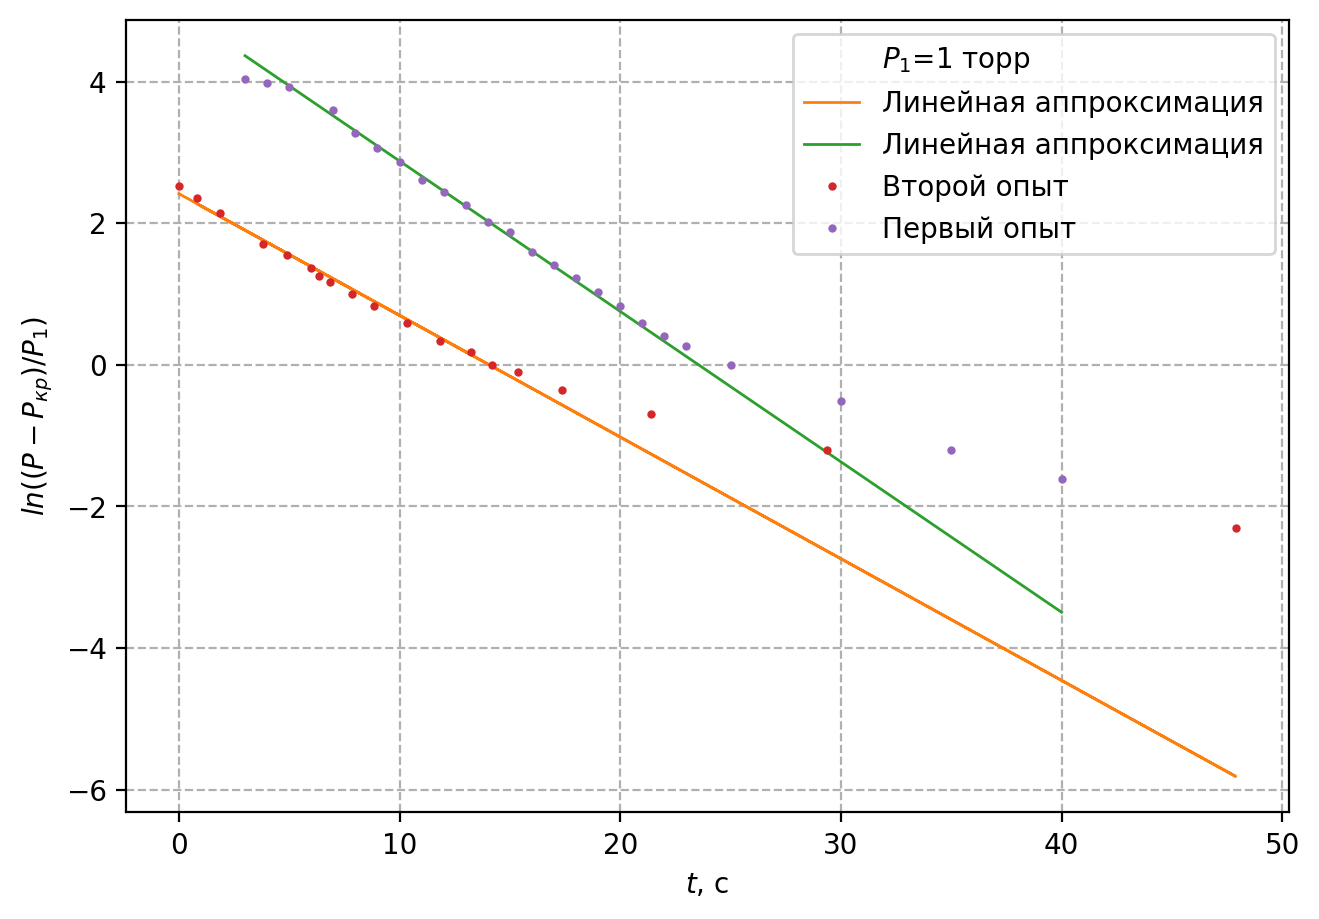

In [71]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$ln((P-P_{кр})/P_1)$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot([], [], ' ', label="$P_1$=1 торр")
plt.plot(bet1["t"], kb1 * bet1["t"] + ab1,linewidth=1, label="Линейная аппроксимация") # аппроксимация
plt.plot(bet2["t"], kb2 * bet2["t"] + ab2,linewidth=1, label="Линейная аппроксимация") # аппроксимация
plt.errorbar(bet1["t"], bet1["ln"], label="Второй опыт", fmt="o", ms=2) # точки с погрешностями
plt.errorbar(bet2["t"], bet2["ln"], label="Первый опыт", fmt="o", ms=2)
plt.legend() # легенда

In [59]:
wor1["p*1e-4"]=wor1["p*1e-4"]/10

In [60]:
kw1,aw1=mnk(wor1["t"], wor1["p*1e-4"])
kw2,aw2=mnk(wor2["t"], wor2["p*1e-5"])

Погрешность углового коэфицента
0.002029171904723603
Погрешность свободного коэфицента
0.06411495218655859
Погрешность углового коэфицента
0.004022872035625983
Погрешность свободного коэфицента
0.12394412596392239


In [64]:
kw2

0.5170787913584182

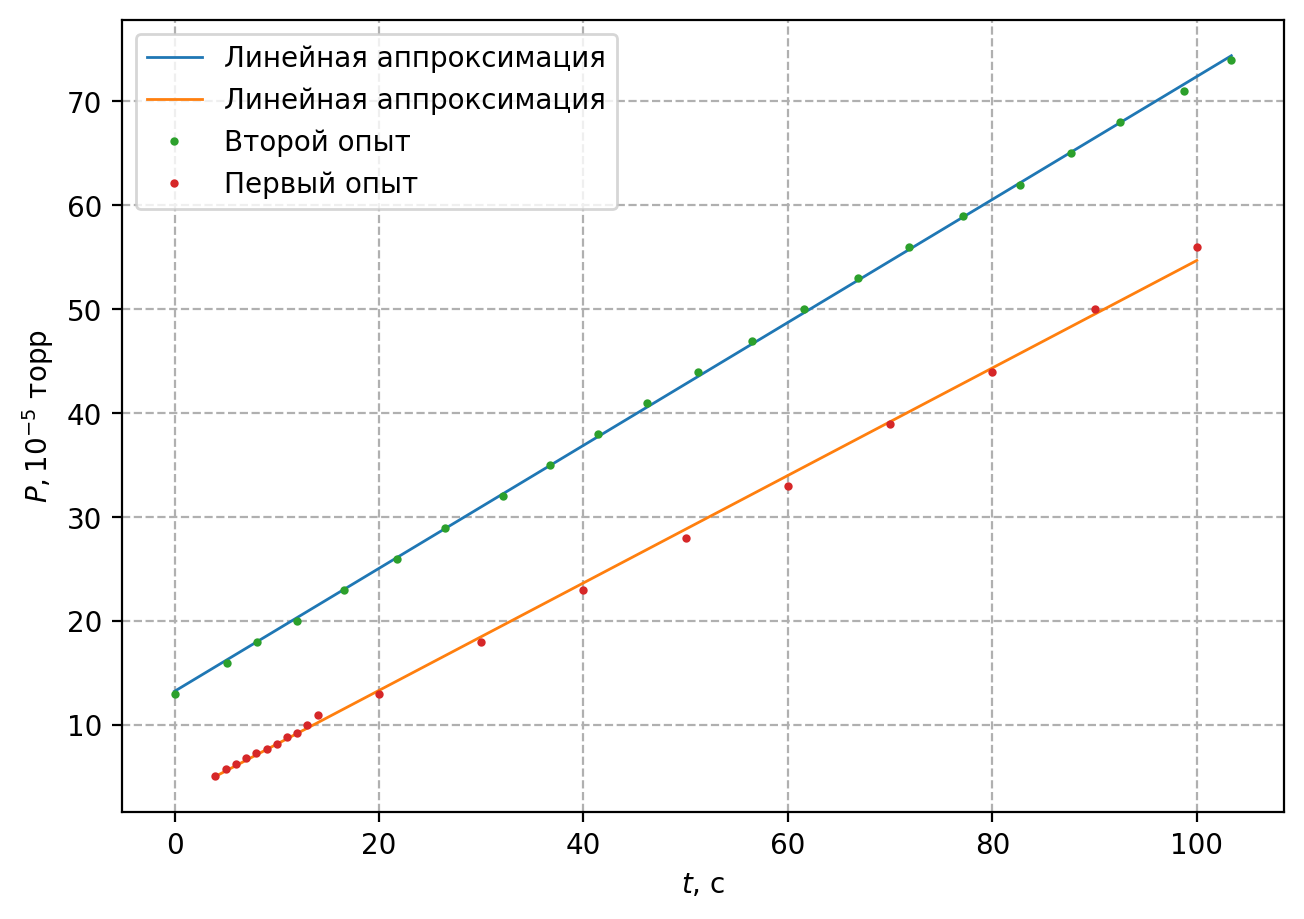

In [63]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$P, 10^{-5}$ торр") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(wor1["t"], kw1 * wor1["t"] + aw1,linewidth=1, label="Линейная аппроксимация") # аппроксимация
plt.plot(wor2["t"], kw2 * wor2["t"] + aw2,linewidth=1, label="Линейная аппроксимация") # аппроксимация
plt.errorbar(wor1["t"], wor1["p*1e-4"], label="Второй опыт", fmt="o", ms=2) # точки с погрешностями
plt.errorbar(wor2["t"], wor2["p*1e-5"], label="Первый опыт", fmt="o", ms=2)
plt.legend() # легенда